In [109]:
!pip3 install opencv-contrib-python==3.3.0.9

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_contrib_python-3.3.0.9-cp36-cp36m-manylinux1_x86_64.whl (14.8 MB)
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.2.0.32
    Uninstalling opencv-contrib-python-4.2.0.32:
      Successfully uninstalled opencv-contrib-python-4.2.0.32


In [1]:
import cv2
import dlib
import numpy as np
import glob
from matplotlib import pyplot as plt
from pylmnn import LargeMarginNearestNeighbor as LMNN
#from dml import LMNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from imutils import face_utils

/home/akshay/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [101]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

class Marginal_knn:
    def __init__(self, n_neighbors):
        self.k = n_neighbors
        self.knn = KNeighborsClassifier(n_neighbors=self.k)
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.knn.fit(X,y)
        
    def predict_proba(self, X):
        ip_neigh_dist, ip_neigh_ind = self.knn.kneighbors(self.X, n_neighbors=self.k, return_distance=True)
        x_neigh_dist, x_neigh_ind = self.knn.kneighbors(X, n_neighbors=self.k, return_distance=True)
        class_probs = np.zeros((len(X), len(y)), dtype = float)
        classes = knn.classes_
        for i in len(X):  ## for all samples xi
            ni = np.zeros(len(classes), dtype=int)
            for p in x_neigh_ind[i]:
                ni[y[p]]+=1
            for j in len(self.k):  ## for all neighbours xj of xi
                idx = x_neigh_ind[i,j]
                nj = np.zeros(len(classes), dtype=int)
                for p in ip_neigh_ind[idx]:
                    nj[y[p]]+=1
                class_probs[y[idx]] = np.sum(ni*nj)/(self.k*self.k)
        return class_probs
    
    def predict(self,X):
        x_neigh_dist, x_neigh_ind = self.knn.kneighbors(X, n_neighbors=self.k, return_distance=True)
        classes = knn.classes_
        probs = []
        for i in range(len(X_test)-1):
            ni = np.zeros(len(classes), dtype=int)
            for p in x_neigh_ind[i]:
                ni[self.y[p]]+=1
            for j in range(i+1,len(X_test)):
                nj = np.zeros(len(classes), dtype=int)
                for p in x_neigh_ind[j]:
                    nj[self.y[p]]+=1
                probs.append(np.sum(ni*nj)/(self.k*self.k))
        return probs
    '''
    def score(self, X, y):
        probs = self.predict_proba(X)
        pred_class = []
        for i in len(X):
            pred_class = 
    '''

In [2]:
face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
def get_face(files):
    faces = []
    for file in files:
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        if len(image.shape) > 2:
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        else:
            gray = image
        face = face_cascade.detectMultiScale(gray, 1.3, 5)
        if len(face) == 0:
            return faces, False
        face = gray[face[0][0]:face[0][0]+face[0][2], face[0][1]:face[0][1]+face[0][3]]
        face = cv2.resize(face, (150,150)) #(47,62) #(94,125)
        #cv2.imshow('face',face)
        #cv2.waitKey(0)
        face = face.flatten()
        #face = face.astype('float32')
        #face /= 255.0
        faces.append(face)
        '''
        img = image.copy()
        for (x,y,w,h) in faces:
            img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),5)
        
        plt.figure(figsize=(10,10))
        plt.axis("off")
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
        '''
    return faces, True

In [3]:
name_file = open('./all_images.txt', 'r')
lines = name_file.readlines()

In [64]:
images = []
labels = []
label_count = 0
face_train, face_test, y_train, y_test = [], [], [], []
for line in lines:
    #print(line)
    name, count = line.split()[0], line.split()[1]
    if int(count)>14 :
        files = glob.glob('./lfw-deepfunneled/'+name+'/*')
        #print(files)
        faces, flag = get_face(files)
        if flag:
            tmp = 0
            for face in faces:  #for i in range(10):  
                #if tmp!=2 and tmp != 3 and tmp!=6 and tmp!=9 and tmp !=11 and tmp!=13:
                if tmp != 3 and tmp!=5 and tmp!=6 and tmp!=9 and tmp!=11:
                    face_train.append(face)
                    y_train.append(label_count)
                else:
                    face_test.append(face)
                    y_test.append(label_count)
                tmp+=1
            label_count+=1
        else:
            print("Notfound")
        
y = y_train+y_test
y = label_binarize(y, classes=list(range(label_count)))
n_classes = y.shape[1] 
print(np.shape(y))
print(np.shape(face_train), np.shape(face_test))
print(label_count)

Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
Notfound
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
(1125, 40)
(925, 22500) (200, 22500)
40


In [63]:
images = face_train+face_test
print(np.shape(images))
pca = PCA(n_components=200)
output_pca = pca.fit_transform(images)
print(output_pca.shape)
X_train = output_pca[:len(face_train)]
X_test = output_pca[len(face_train):]
y_bin_train = y[:len(face_train)]
y_bin_test = y[len(face_train):]

(1125, 22500)
(1125, 200)
(1125, 39)


In [58]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(output_pca, labels, test_size=0.3, random_state=42)

In [67]:
k_train, k_test, n_components, max_iter = 5, 5, output_pca.shape[1], 300

# Instantiate the metric learner
lmnn = LMNN(n_neighbors=k_train, max_iter=max_iter, n_components=n_components)
#lmnn = LMNN(k=k_train, max_iter=max_iter)
# Train the metric learner
lmnn.fit(X_train, y_train)
print("fit done")
lmnn_train_op = lmnn.transform(X_train)

fit done


In [110]:
knn = KNeighborsClassifier(n_neighbors=k_test)
knn.fit(lmnn_train_op, y_train)
y_pred = knn.predict(X_test)
lmnn_positive_count = 0
y_pair_actual = []
y_pair_pred = []
for i in range(len(X_test)-1):
    for j in range(i+1,len(X_test)):
        if y_test[i]==y_test[j]:
            y_pair_actual.append(1)
        else:
            y_pair_actual.append(0)
        if y_pred[i]==y_pred[j]:
            y_pair_pred.append(1)
        else:
            y_pair_pred.append(0)
        if y_test[i]==y_test[j] and y_pred[i]==y_pred[j]:
            lmnn_positive_count+=1
        if y_test[i]!=y_test[j] and y_pred[i]!=y_pred[j]:
            lmnn_positive_count+=1
print(lmnn_positive_count, ((len(X_test)*(len(X_test)-1))))
lmnn_acc = lmnn_positive_count/((len(X_test)*(len(X_test)-1)))
#lmnn_acc = knn.score(lmnn.transform(X_test), y_test)
print('LMNN accuracy on test set of {} points: {:.4f}'.format(len(X_test[0]), lmnn_acc))

18112 39800
LMNN accuracy on test set of 200 points: 0.4551


In [79]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_pair_actual, y_pair_pred)  #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_pair_actual, y_pair_pred)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print(roc_auc)

{0: 0.5146089743589743, 1: 0.5146089743589743, 'micro': 0.5146089743589743}


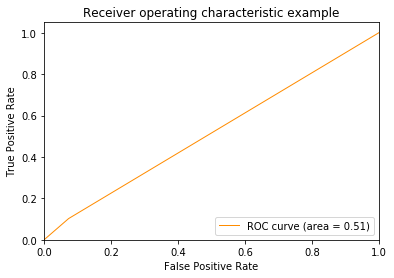

In [80]:
plt.figure()
lw = 1
x = 0
plt.plot(fpr[x], tpr[x], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[x])
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [82]:
#y_prob = knn.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_pair_actual, y_pair_pred, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_pair_actual, y_pair_pred, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_pair_pred, y_pair_pred, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_pair_actual, y_pair_actual, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.514609 (macro),
0.514609 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
1.000000 (macro),
1.000000 (weighted by prevalence)


In [103]:
Mknn = Marginal_knn(n_neighbors=k_test)
Mknn.fit(lmnn_train_op, y_train)
y_pair_pred = Mknn.predict(X_test)

In [104]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_pair_actual, y_pair_pred)  #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_pair_actual, y_pair_pred)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print(roc_auc)

{0: 0.5547385256410257, 1: 0.5547385256410257, 'micro': 0.5547385256410257}


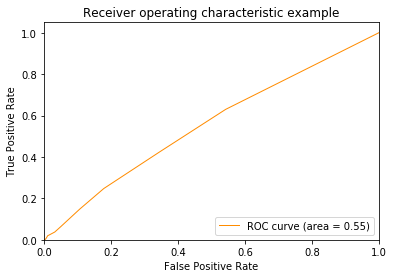

In [105]:
plt.figure()
lw = 1
x = 0
plt.plot(fpr[x], tpr[x], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[x])
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [107]:
macro_roc_auc_ovo = roc_auc_score(y_pair_actual, y_pair_pred, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_pair_actual, y_pair_pred, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_pair_actual, y_pair_pred, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_pair_actual, y_pair_pred, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.554739 (macro),
0.554739 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.554739 (macro),
0.554739 (weighted by prevalence)


In [115]:
from dml import kNN

In [118]:
lmnn = LMNN()
knn = kNN(n_neighbors=5,dml_algorithm=lmnn)

lmnn.fit(X_train,y_train)
knn.fit(X_train,np.array(y_train))
score = knn.score(X_test, y_test)
orig_score = knn.score_orig()
print(score, orig_score)

0.455 0.23675675675675675


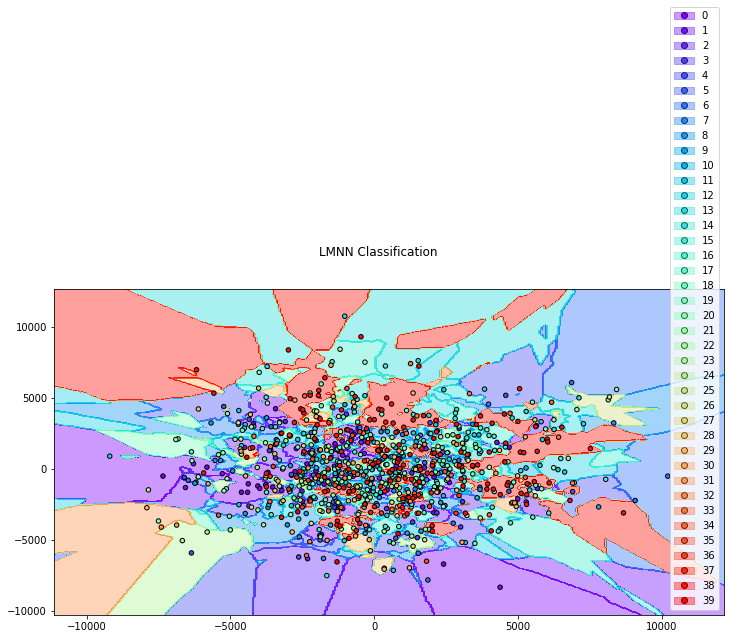

In [121]:
from dml import NCMC_Classifier, classifier_plot, dml_plot, knn_plot, dml_multiplot, knn_pairplots

f1 = classifier_plot(X_train[:,[0,1]],y_train,clf=knn,title = "LMNN Classification",cmap="rainbow",figsize=(12,6))

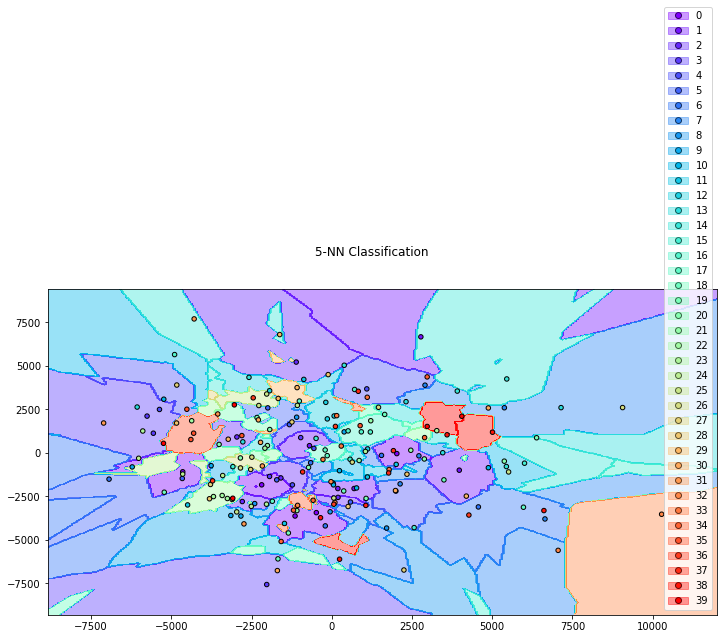

In [123]:
f2 = knn_plot(X_test[:,[0,1]],y_test,k=5,title = "5-NN Classification", cmap="rainbow", figsize=(12,6))

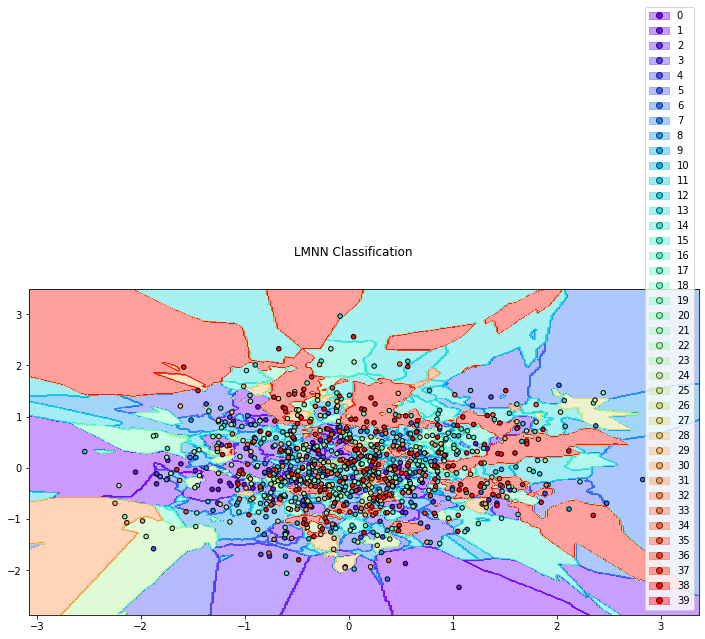

In [125]:
f3 = dml_plot(X_train[:,[0,1]],y_train,clf=knn,dml=lmnn,title = "LMNN Classification", cmap="rainbow",figsize=(12,6))